**0. Import libraries**

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

**1. Load dataset**

In [2]:
# Load the dataset
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

**2. Handle missing values**

In [3]:
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)

**3. Encode categorical variables**

In [4]:
label_cols = ['Education', 'Marital_Status']
label_encoders = {col: LabelEncoder() for col in label_cols}

for col in label_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

In [5]:
# Convert 'Dt_Customer' column to datetime format and extract year
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Year'] = df['Dt_Customer'].dt.year

In [6]:
# Drop 'Dt_Customer' and 'ID' columns as they are not needed for clustering
df.drop(columns=['Dt_Customer', 'ID'], inplace=True)

**4. Standardize the data**

In [7]:
# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

**5. Apply K-means clustering**

In [8]:
# Apply KMeans clustering to classify into 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

**6. Visualize clusters**

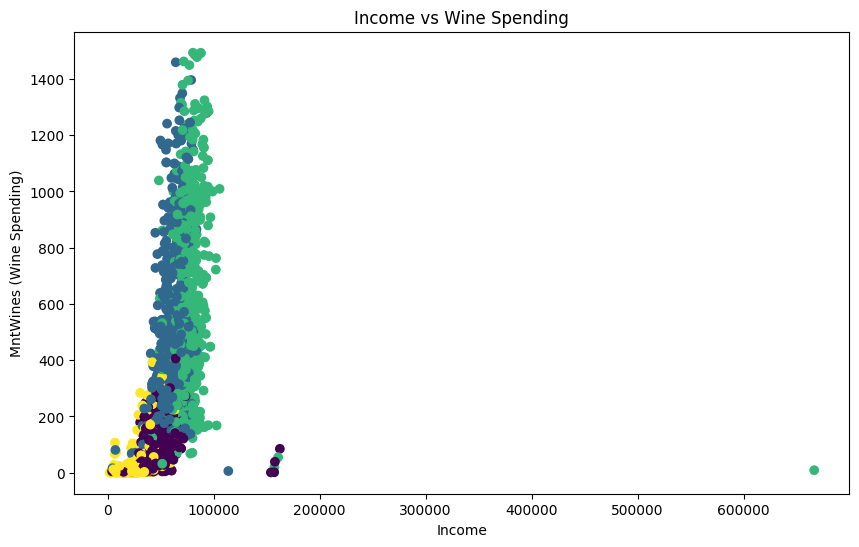

In [9]:
# Visualizing the clusters
# Plotting Income vs Wine Spending
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['MntWines'], c=df['Cluster'], cmap='viridis')
plt.title('Income vs Wine Spending')
plt.xlabel('Income')
plt.ylabel('MntWines (Wine Spending)')
plt.show()

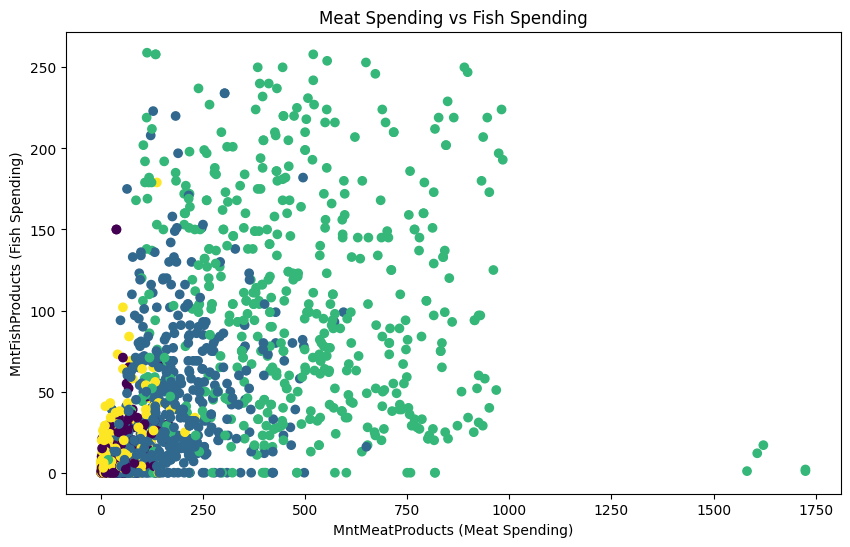

In [10]:
# Plotting Meat Spending vs Fish Spending
plt.figure(figsize=(10, 6))
plt.scatter(df['MntMeatProducts'], df['MntFishProducts'], c=df['Cluster'], cmap='viridis')
plt.title('Meat Spending vs Fish Spending')
plt.xlabel('MntMeatProducts (Meat Spending)')
plt.ylabel('MntFishProducts (Fish Spending)')
plt.show()

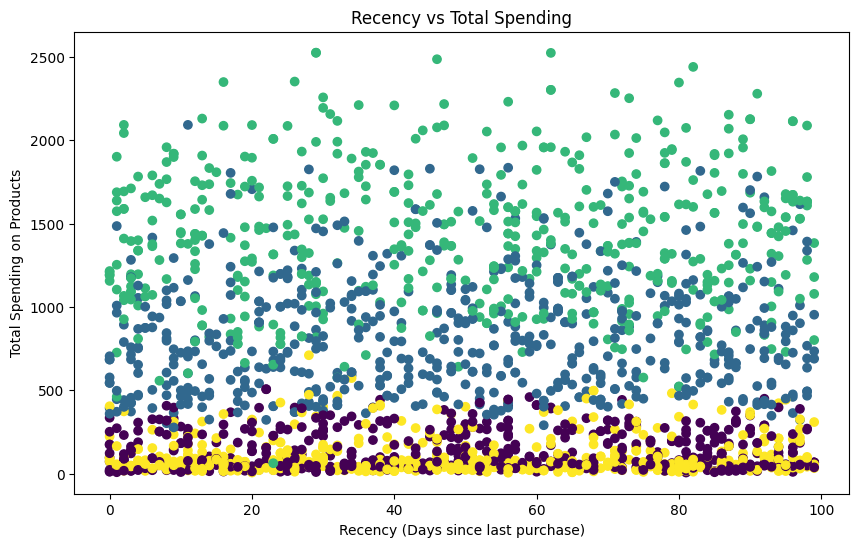

In [11]:
# Plotting Recency vs Total Spending on products
total_spending = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
plt.figure(figsize=(10, 6))
plt.scatter(df['Recency'], total_spending, c=df['Cluster'], cmap='viridis')
plt.title('Recency vs Total Spending')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Total Spending on Products')
plt.show()

**7. Display cluster traits**

In [12]:
# Step 7: Displaying key traits of each cluster
cluster_traits = df.groupby('Cluster').mean()
print(cluster_traits)

          Year_Birth  Education  Marital_Status        Income   Kidhome  \
Cluster                                                                   
0        1962.891743   2.596330        3.746789  43838.816514  0.653211   
1        1965.003401   2.610544        3.709184  59736.526361  0.188776   
2        1968.765385   2.350000        3.775000  78209.469231  0.040385   
3        1978.141397   2.027257        3.695060  29517.731687  0.863714   

         Teenhome    Recency    MntWines  MntFruits  MntMeatProducts  ...  \
Cluster                                                               ...   
0        0.955963  50.253211   78.355963   4.623853        28.185321  ...   
1        0.903061  48.403061  506.901361  29.894558       158.442177  ...   
2        0.105769  49.440385  617.201923  67.632692       480.342308  ...   
3        0.045997  48.461670   32.553663   6.218058        26.686542  ...   

         AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
Clust